# FIR Filterentwurf

<img style="float: right; margin:5px 0px 0px 10px" src="img/prism.gif" width="400">

Ein FIR-Filter (Finite Impulse Response) ist ein Filter, dessen Impulsantwort (oder Antwort auf eine Eingabe mit endlicher Länge) von endlicher Dauer ist, da sie sich in endlicher Zeit auf Null einstellt. Dies steht im Gegensatz zu IIR-Filtern (Infinite Impulse Response), die interne Rückkopplungen aufweisen und möglicherweise unbegrenzt weiter reagieren (normalerweise abklingend). Die Entwurfsmethoden umfassen Least MSE, Minimax, Frequenzabtastung usw. (siehe die Vorlesung: Thema1-Filter). Hier diskutieren wir die Frequenzabtastung - und damit den Filterentwurf - mittels inverser Fourier-Transformation, da er gleichzeitig einen grundlegenderen Einblick in die Signaltheorie bietet. 

## Inhalt  

<table style="width:256px; border: 1px solid black; display: inline-block">
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-intro.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#intro'>1. Wiederholung</a>
      </td>
  </tr>  
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-idtft.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#idtft'>2. Inverse DTFT</a>
      </td>
  </tr>  
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-idft.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#idft'>2. Inverse DFT</a>
      </td>
  </tr>  
</table>


---

<a id='intro'></a><div><img src="img/IMG-intro.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">1. Wiederholung </h2></div>

Die Zusammenhänge zwischen Fourier-Transformation, Fourier-Reihe, DTFT und DFT, wie sie in der Vorlesung Thema1-Filter zusammgenfasst wurden, sind in der nachfolgenden Grafik noch einmal dargestellt:

![transformation](img/transformation.jpg)

- __Fourier-Reihe:__   
Die Fourier-Reihe beschreibt, dass jede periodische Funktion $x(t)$ durch eine unendliche Reihe dargestellt werden kann, die aus Sinusfunktion und Cosinusfunktion besteht (die Sinusfunktion und die Cosinusfunktion werden als Basisfunktionen gewählt, weil sie orthogonal zuneinander sind). Nach der Euler-Formel können diese Funktionen wie nachfolgend auch als Exponentialform geschrieben werden
\begin{equation}
x_T(t) = \sum_{n = -\infty}^{\infty}X_ne^{j\omega_0 n t},
\end{equation}
weswegen die Fourier-Reihe auch als Exponentialreihe bezeichnet wird. Index $T$ verdeutlicht die Periodizität in $T$, wobei $T$ die zeitliche Periode des Signals $x(t)$ ist, über welche die Fourier-Koeffizienten $X_n$ bestimmt werden. $\omega_0 = \frac{2\pi}{T}$ ist die Grundfrequenz (in [rad/s]). 
- __Fourier-Transformation:__   
Die Fourier-Transformation ist eigentlich eine Verallgemeinerung der Fourier-Reihe, da das Integral tatsächlich ein Summationsoperator in der Grenzform $T\rightarrow \infty \Rightarrow \omega_0 \rightarrow 0$ ist [3]. Die Fourier-Transformation wird hauptsächlich zur Analyse kontinuierlicher nichtperiodischer Signale verwendet. Für ein kontinuerliches (= analoges), nichtperiodisches Signal kann das Spektrum durch Fourier-Transformation berechnet werden. Da das Signal kontinuierlich und  nichtperiodisch ist, kann es Anteile aller möglichen Frequenzen von $\omega = 0$ bis $\omega \rightarrow \infty$ enthalten, wodurch das Spektrum ebenfalls nichtperiodisch und kontinuierlich (in $\omega$) ist.   
- __DTFT:__   
Da ein digitaler Computer nur digitale Signale verarbeiten kann, ist es zunächst erforderlich, das ursprüngliche analoge Signal im Zeitbereich zu diskretisieren, d.h., im Zeitbereich abzutasten (z.B. über einen Dirac-Impuls an den Zeitpunkten $k\Delta t$) und eine Fourier-Transformation für das abgetastete zeitdiskrete Signal, die sogenannte _zeitdiskrete Fourier-Transformation_, durchzuführen. Das Zeitsignal ist damit nicht-periodisch und diskret, wogegen das Spektrum periodisch und kontinuierlich ist. Dies ist der symmetrische Gegenfall zu der Fourier-Reihe, wo das analysierte Zeitsignal periodisch und kontinuierlich ist, das Spektrum dagegen diskret und nicht-periodisch ist (= Linienspektrum). Für Theorie-Enthusiasten ist eine umfangreichere Ausführung zu diesem Zusammenhang in Dokument __impulseSamplingAndDTFT.pdf__ in OPAL zu finden.
- __DFT:__   
Die _diskrete Fourier-Transformation_ erhält man, indem die DTFT bzw. das daraus resultierende, kontinuierliche Spektrum, an  $N$ festen Frequenzpunkten $f = \frac{n}{N}\cdot f_s$ im Intervall $[0, f_s]$ abgetastet wird. $\Omega = \frac{2\pi f}{f_s}$ wird dadurch zu $\Omega = \frac{2\pi n}{N}$, da sich $f_s$ herauskürzt. 

----

<a id='idtft'></a><div><img src="img/IMG-idtft.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">2. Inverse DTFT </h2></div>

Die inverse DTFT ist eine Möglichkeit, um die Impulsantwort im Zeitbereich aus einem vorgegebenen Frequenzgang $H(\omega)$ im Bild-/Spektralbereich zu berechnen. Der gegebene Amplitudenfrequenzgang ist kontinuierlich, aperiodisch und reell (siehe Übung 2, Aufgabe 1). Unter der Verwendung der inversen DTFT,  
\begin{equation}
x(k)=\frac{1}{2\pi}\int_{-\pi}^{\pi}H(e^{j\Omega})e^{jk\Omega}d\Omega 
\end{equation}  
wird implizit die Annahme getroffen, dass das ursprünglich aperiodische Spektrum $H(\omega)$ nun periodisch ist (mit einer spektralen Grundperiode, und weiterhin kontinuierlich + reell), über $H(e^{j\Omega})$ ausgedrückt wird und in eine nicht-periodische, diskrete Impulsantwort $x(k)$ transformiert wird.
Wie in der Übung wird nachfolgend ein Hochpassfilter über die Methode der inversen DTFT entworfen.

***

Importieren Sie nun alle dafür benötigten externen Module:

In [ ]:
# Importieren Sie:
#    - numpy mit dem Alias np
#    - Das Modul pyplot aus der Bibliothek matplotlib mit dem Alias plt
#    - Die Module integrate, fft und signal aus der Bibliothek scipy in den globalen Namensraum.

[..]

[..]

[..]

In [214]:
# Lösung
# Importieren Sie:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, fft, signal

Zuerst werden die Variablen für den gewünschten Hochpass definiert und ein Array mit dem idealen Frequenzgang $H\_soll$ erzeugt und geplottet. Dafür eignet sich die Numpy-Funktion [numpy.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html). Das erste Argument ist eine Bedingung, gefolgt von zwei Arrays als Argument zwei und drei. Abhängig von der Bedingung im ersten Argument wird entweder der Wert aus dem ersten oder zweiten Array ausgewählt.

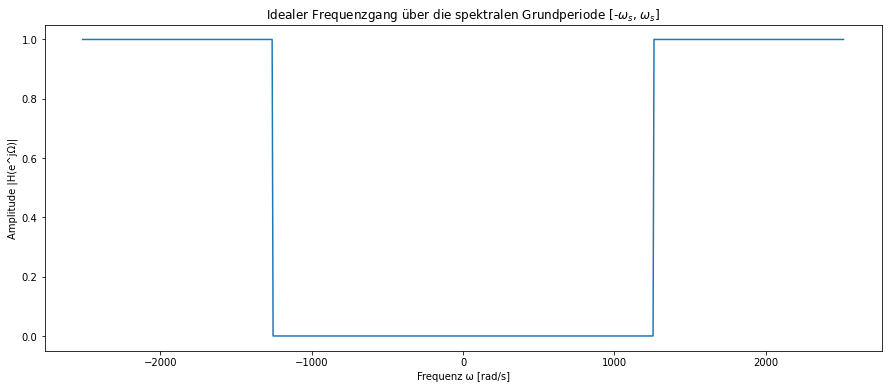

In [215]:
'''
Beispiel: Endliche Impulsantwort eines Hochpassfilters mittels inverser DTFT
'''

# Initialisierung aller wichtigen Variablen:
fs_Hz = 800              # Abtastfrequenz in [Hz]
ws_rad_s = 2*np.pi*fs_Hz # Abtastfrequenz in [rad]

fc_Hz = 400              # Grenzfrequenz (= corner frequency) des Filters in [Hz]
wc_rad_s = 2*np.pi*fc_Hz # Grenzfrequenz des Filters in [rad]

A = 1                    # Amplitude im Passband


# idealer Frequenzgang:
H_soll = 0
w_rad_s = np.linspace(-ws_rad_s, ws_rad_s, fs_Hz) # omega, linear und äquidistant aus [-ws_rad_s, ws_rad_s]
H_soll = np.where((w_rad_s >= -wc_rad_s) & (w_rad_s <= wc_rad_s), 0, A)
    
# Graphische Darstellung
plt.title('Idealer Frequenzgang über die spektralen Grundperiode [-$\omega_s$, $\omega_s$]')
plt.xlabel('Frequenz ω [rad/s]') 
plt.ylabel('Amplitude |H(e^jΩ)|') 
plt.plot(w_rad, H_soll)

plt.gcf().set_size_inches(15, 6)
plt.show()

Die Impulsantwort $h(k)$ wird über die IDTFT aus dem Frequenzverhalten des idealen Hochpass berechnet und geplottet. Dabei wird die Integration in der IDTFT mit dem Objekt [integrate.quad](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) über numerische Integration angenähert.

In [ ]:
# Endliche Impulsantwort (reell) mit der IDTFT berechnen:
k = np.arange(-fs_Hz//2, fs_Hz//2)

# Über alle Sample-Zeitpunkte in k iterieren und numerisch integrieren (Annäherung an das Integral der IDTFT):
h = []                 # Impulsantwort (Allokation des Arrays unbestimmter Länge)
for i in k:
    an, err = integrate.quad(lambda w_rad:A*np.cos(i*w_rad/fs_Hz), wc_rad, 3*wc_rad, limit=fs_Hz)
    h.append(an / (2*np.pi*fs_Hz))

# Graphische Darstellung:
kLimMin = -200
kLimMax = 200
plt.title('Impulsantwort h(k) (Sichtbar für k=[%d,' %kLimMin + ' %d])'  %kLimMax) 
plt.xlabel('Abtastwertindex k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(-200, 200)  
plt.stem(k, h, use_line_collection=True)

plt.gcf().set_size_inches(15, 6)
plt.show()

Anschließend wird die Impulsantwort h(k) mittels der DTFT zurück in den Frequenzbereich transformiert, geplottet und mit dem vorgegebenen, idealen Frequenzgang verglichen. Dabei erkennt man sehr gut ein Überschwingen bei den Sprüngen im idealen Hochpass durch die Rücktransformation mit einer _endlichen_ Anzahl an Frequenzen/Abtastwerten.

In [ ]:
# Realer Frequenzgang der berechneten, abgeschnittenen Impulsantwort h(k) mittels der DTFT:
W_rad = np.linspace(-np.pi, np.pi, 10000)
H_ist = np.zeros(W_rad.size, dtype='complex128') # H_ist für das Ergebnis der DTFT allokieren 

# Über alle h(k) iterieren und jeweils X(k) berechnen:
for i in k:
    H_ist += h[i]*np.exp(-1j*W_rad*k[i])
    
# Graphische Darstellung:
plt.subplot(211)
plt.title('realer Frequenzgang der Impulsantwort h(k) für den Bereich k=[%d' %np.min(k) + ', %d]' %np.max(k))
plt.xlabel('Frequenz ω') 
plt.ylabel('$|H(e^{jΩ})|$') 
plt.plot(W_rad*fs_Hz, np.abs(H_ist))

plt.subplot(212)
plt.title('Idealer Frequenzgang über die spektrale Grundperiode [-$\omega_s$, $\omega_s$]')
plt.xlabel('Frequenz ω') 
plt.ylabel('$|H(e^{jΩ})|$') 
plt.plot(w_rad, H_soll)

plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
# Lösung 

'''
Beispiel: Endliche Impulsantwort eines Hochpassfilters mittels inverser DTFT
'''

# Initialisierung aller wichtigen Variablen:
fs_Hz = 800            # Abtastfrequenz in [Hz]
fs_rad = 2*np.pi*fs_Hz # Abtastfrequenz in [rad]
fc_Hz = 400            # Grenzfrequenz (= corner frequency) des Filters in [Hz]
wc_rad = np.pi*fc_Hz   # Grenzfrequenz des Filters in [rad]
A = 1                  # Amplitude im Passband
h = []                 # Impulsantwort (Allokation des Arrays unbestimmter Länge)

# idealer Frequenzgang:
H_soll = 0
w_rad = np.linspace(-np.pi*fs_Hz, np.pi*fs_Hz, fs_Hz) # omega, linear und äquidistant aus [0, fs_Hz]
for i in range(-1,2):
    H = np.where((w_rad <= i*2*np.pi*fs_Hz + 3*wc_rad) & (w_rad >= i*2*np.pi*fs_Hz + wc_rad), A, 0)
    H_soll += H
    
# Endliche Impulsantwort (reell) mit der IDTFT berechnen:
k = np.arange(-fs_Hz//2, fs_Hz//2)
# Über alle Sample-Zeitpunkte in k iterieren und numerisch integrieren (Annäherung an das Integral der IDTFT):
for i in k:
    an, err = integrate.quad(lambda w_rad:A*np.cos(i*w_rad/fs_Hz), wc_rad, 3*wc_rad, limit=fs_Hz)
    h.append(an / (2*np.pi*fs_Hz))

# Realer Frequenzgang der berechneten, abgeschnittenen Impulsantwort h(k) mittels der DTFT:
W_rad = np.linspace(-np.pi, np.pi, 5000)
H_ist = np.zeros(W_rad.size, dtype='complex128') # H_ist für das Ergebnis der DTFT allokieren 

# Über alle h(k) iterieren und jeweils X(k) berechnen:
for i in k:
    H_ist += h[i]*np.exp(-1j*W_rad*k[i])
    
# Graphische Darstellung
plt.subplot(311)
plt.title('Idealer Frequenzgang über die spektralen Grundperiode [-$\omega_s$, $\omega_s$]')
plt.xlabel('Frequenz ω') 
plt.ylabel('Amplitude |H(e^{jΩ})|') 
plt.plot(w_rad, H_soll)

kLimMin = -200
kLimMax = 200
plt.subplot(312)
plt.title('Impulsantwort h(k) (Sichtbar für k=[%d,' %kLimMin + ' %d])'  %kLimMax) 
plt.xlabel('Abtastwertindex k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(-200, 200)  
plt.stem(k, h, use_line_collection=True)

plt.subplot(313)
plt.title('realer Frequenzgang der Impulsantwort h(k) (mit k aus [%d' %np.min(k) + ', %d])' %np.max(k))
plt.xlabel('Frequenz ω') 
plt.ylabel('Amplitude $|H(e^{jΩ})|$') 
plt.plot(W_rad*fs_Hz, np.abs(H_ist))

plt.gcf().set_size_inches(15, 15)
plt.show()

Um den Einfluss der Anzahl an Abtastwerten $L$ der Impulsantwort auf den Frequenzgang zu veranschaulichen, wird nun über eine for-Schleife die soeben berechnete Impulsantwort $h(k)$ mittels `np.where`-Operator beschnitten ($h_w(k)$). Das hat zur Folge, dass die Impulsantwort mit einem Rechteckfenster gefenstert wird. Die Auswirkung dessen kann über Fouriertransformation im Frequenzbereich $H_w(e^{j\Omega}$) betrachtet werden.

Hinweis: Der `//`-Operator gibt als Ergebnis eine ganzzahlige Zahl aus, indem der Rest hinter dem Komma abgeschnitten wird.

In [ ]:
'''
Aufgabe: Beschränkte Impulsantwort mit verschiedenen Fensterlängen L = 10, 20, 50, 200 berechnen
(Hinweis: Sie können die berechnete Impulsantwort aus dem vorherigen Beispiel direkt nutzen.
 Probieren Sie auch aus, was passiert, wenn die Impulsantwort nicht symmetrisch um k = 0 gefenstert wird.)
'''

for L in (10, 20, 50, 100):
    # Fensterung mit einem Rechteckfenster (auf Wertebereich der Länge +-L/2 beschränken):
    hw = [..] # ToDo: Erzeugen der gekürzten Impulsantwort h mit dem where-Operation 
    # Spectralen mittels FFT 
    Hw = [..] # ToDo: Berechnung des resultierenden Frequenzgangs von hw mittels fft und fftshift
    
    # TODO: In der Übung berechnete Impulsantwort h(k) darüber plotten

    plt.subplot(121)
    plt.title('Impulsantwort mit Fensterlänge L=%d' %L)
    plt.xlabel('Abtastwertindex k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(fs_Hz//2-L, fs_Hz//2+L)
    plt.xticks(np.arange(fs_Hz//2-L, fs_Hz//2+L+1, L/5), range(-L, L+1, L//5))
    plt.stem(hw, use_line_collection=True) 

    plt.subplot(122)
    plt.title('Resultierender Frequenzgang für L=%d' %L)
    plt.xlabel('Frequenz ω') 
    plt.ylabel('Amplitude |H(e^jω)|') 
    plt.plot(k, Hw)

    plt.gcf().set_size_inches(16, 4)
    plt.show()

In [ ]:
# Lösung
'''
Aufgabe: Beschränkte Impulsantwort mit verschiedenen Fensterlängen L = 10, 20, 50, 200 berechnen
(Hinweis: Sie können die berechnete Impulsantwort aus dem vorherigen Beispiel direkt weiterverwenden.
 Probieren Sie auch aus, was passiert, wenn die Impulsantwort nicht symmetrisch um k = 0 gefenstert wird.)
'''

for L in (10, 20, 50, 100):
    # Fensterung mit einem Rechteckfenster (auf Wertebereich der Länge +-L beschränken):
    hw = np.where((k<=(L/2)) & (k>=(-L/2)), h, 0)

    # Realer Frequenzgang der berechneten, abgeschnittenen Impulsantwort h(k) mittels der DTFT für k = [-L/2,L/2]:
    W_rad = np.linspace(-np.pi, np.pi, 1000)
    H_ist = np.zeros(W_rad.size, dtype='complex128') # H_ist für das Ergebnis der DTFT allokieren 

    # Über alle h(k) iterieren und jeweils X(k) berechnen und aufsummieren:
    for i in k:
        H_ist += hw[i]*np.exp(-1j*W_rad*k[i])

    plt.subplot(121)
    plt.title('Impulsantwort mit Fensterlänge L=%d' %L)
    plt.xlabel('Abtastwertindex k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(fs_Hz//2-L, fs_Hz//2+L)
    plt.xticks(np.arange(fs_Hz//2-L, fs_Hz//2+L+1, L/5), range(-L, L+1, L//5))
    plt.stem(hw, use_line_collection=True) 

    plt.subplot(122)
    plt.title('Resultierender Frequenzgang für L=%d' %L)
    plt.xlabel('Frequenz ω') 
    plt.ylabel('Amplitude |H(e^jω)|') 
    plt.plot(W_rad*fs_Hz, np.abs(H_ist))

    plt.gcf().set_size_inches(16, 4)
    plt.show()

----

<a id='idft'></a><div><img src="img/IMG-idft.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">3. Inverse DFT </h2></div>

Für die IDTFT in Abschnitt 2 musste ein Integral über die (logischerweise kontinuierliche) Variable $\Omega$ ausgewertet werden, was über eine numerische Integration gelöst wurde. Die IDFT eignet sich für digitale Computer deutlich besser, da sie mit diskreten Abtastwerten arbeitet.

Im Folgenden soll daher dasselbe Vorgehen mit der IDFT anstatt der IDTFT durchgeführt werden. Die IDFT ist definiert durch
\begin{equation*}
h(k)=\sum_{n=0}^{N-1}H(n)e^{j2\pi kn/N},
\end{equation*}  
und ergibt sich direkt aus der IDTFT, wenn $\omega$ bzw. $f$ mit $N$ Punkten abgetastet wird (siehe Abschnitt 1, Wiederholung).  

Um die Gleichung der IDFT zunächst besser zu veranschaulichen, wird nachfolgend einmal ein Tiefpassfilter mit einer selbst definierten IDFT nach der obrigen Gleichung entworfen. 

Funktionen in Python starten mit dem Präfix __def__, gefolgt vom Funktionsnamen (idft z.B.) und den Argumenten in Klammern (arg1, arg2, ...), getrennt durch Kommata.
Der Ausgabewert (in diesem Falle die Impulsantwort h(k)) folgt nach einem `return` Statement.

In [204]:
'''
Funktion definieren: idft(func, N)
Impulsantwort mit IDFT, Verschiebung und Fensterung
    
    param func: Funktion für Impulsantwort
    param N: Sample Zahl
''' 

# IDFT
def idft(func, N):   
    h = [] 
    k = np.arange(N)
    for i in range(N): 
        an = np.sum(func * np.exp(1j*2*np.pi*k*i/N))
        h.append(an)     
    # Verschiebung
    h = np.real(h[N//2:] + h[:N//2])
    # Normalisierung
    h = h / (2*np.max(h))
    return h

Wenden Sie nun die neu definierte Funktion zur Berechnung der Impulsantwort $h$ aus dem Frequenzgang des Tiefpassfilters $H_{soll}$ an, der eine Grenzfrequenz bei $f_s/4$ haben soll.

In [205]:
'''
Beispiel: Endliche Impulsantwort eines Tiefpassfilters mittels inverser DFT
'''

# Initialisierung
N = 512  # Sample Zahl
A = 1  # Amplitude 

# Erzeugung der Spektralen des Tiefpassfilters.
H_soll = 0
n = np.linspace(-np.pi, np.pi, N)
for i in range(-2, 2):
    H = np.where((n <= i*2*np.pi + np.pi/2) & (n >= i*2*np.pi - np.pi/2), A, 0)
    H_soll += H 

# Impulsantwort
h = [..] # ToDo: Implementierung der eigen definierten Funktion "idft".


# Graphische Darstellung  
plt.subplot(121)
plt.title('ideale Spektrale in der Grundperiode')
plt.xlabel('Frequenz ω') 
plt.ylabel('|H(n)|') 
plt.plot(n, H_soll)

plt.subplot(122)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(150, 360)
plt.stem(np.real(h), use_line_collection=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

SyntaxError: invalid syntax (<ipython-input-205-7b21fdf78a18>, line 17)

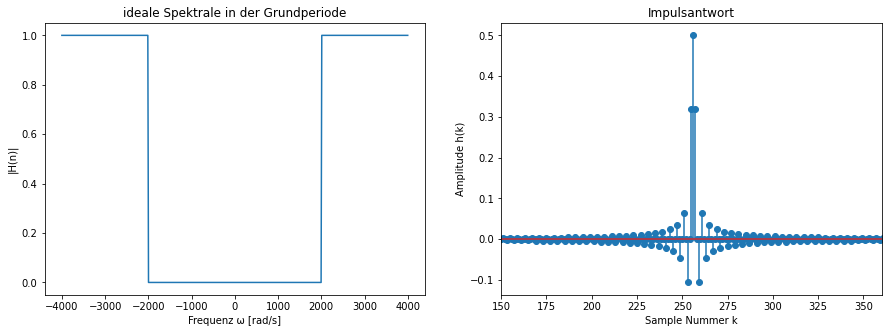

In [206]:
# Lösung

'''
Beispiel: Endliche Impulsantwort eines Tiefpassfilters mittels inverser DFT
'''

# Initialisierung
N = 512 # Sample Zahl
A = 1   # Amplitude 
fs_Hz = 8000;
fc_Hz = fs_Hz/4;
Wc_rad = 2*np.pi*fc_Hz/fs_Hz

# Berechnung des idealen Frequenzganges:
W_rad = np.linspace(-np.pi, np.pi, N)
H_soll = np.where((W_rad >= -Wc_rad) & (W_rad <= Wc_rad), 0, A)

# Impulsantwort
h = idft(H_soll, N)

# plot  
plt.subplot(121)
plt.title('ideale Spektrale in der Grundperiode')
plt.xlabel('Frequenz ω [rad/s]') 
plt.ylabel('|H(n)|') 
plt.plot(W_rad*fs_Hz/(2*np.pi), H_soll)

plt.subplot(122)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(150, 360)
plt.stem(h, use_line_collection=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

Für die DFT und ihre inverse IDFT gibt es im SciPy-Paket die fertigen Objekte [fft.fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) und [fft.ifft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html), wobei immer die FFT verwendet wird (generell wird in der Praxis für die Berechnung der DTF ausschließlich die FFT verwendet. Falls die Anzahl an Abtastwerten keine Zweierpotenz ist, wird das Signal bis zur nächsthöheren Zweierpotenz mit Nullen aufgefüllt). Die selbst definierte IDFT soll nun mit der ifft-Funktion des SciPy-Paketes verglichen werden. Ebenfalls sehr nützlich ist die [ifftshift()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html), welche das DFT/FFT Spektrum in der Mitte um $\Omega = 0$ zentriert, indem die beiden Hälften der Impulsantwort $h(0:N/2-1)$ und $h(N/2:N-1)$ vertauscht werden.

In [ ]:
# Inpulsantwort mittels ifft, ifftshift 
h = [..]   # ToDo: Implementierung der inversen fft von H_soll mittels externem Modul "fft.ifft()". (Frequenzverschiebung nicht vergessen!)


# Graphische Darstellung 
plt.subplot(121)
plt.title('ideale Spektrale in der Grundperiode')
plt.xlabel('Frequenz ω [rad/s]') 
plt.ylabel('Amplitude |H(n)|') 
plt.plot(n, H_soll)

plt.subplot(122)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(150, 350)
plt.stem(h, use_line_collection=True)

plt.gcf().set_size_inches(15, 5)
plt.show()

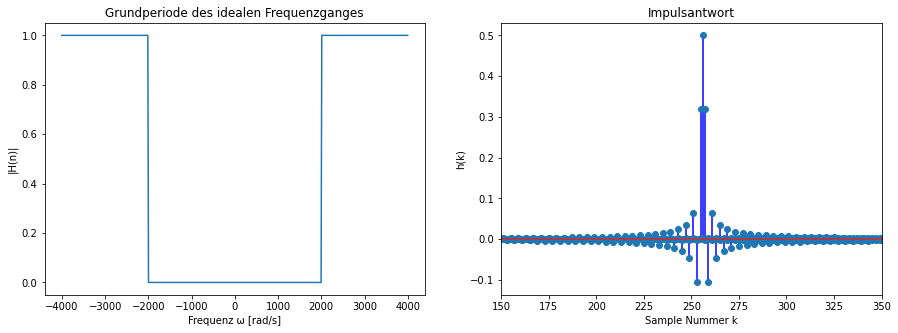

In [207]:
# Lösung
# Inpulsantwort mittels ifft, ifftshift 
# Initialisierung
N = 512 # Länge der IFFT
A = 1   # Amplitude 
fs_Hz = 8000;
fc_Hz = fs_Hz/4;
Wc_rad = 2*np.pi*fc_Hz/fs_Hz

# Berechnung des idealen Frequenzganges:
W_rad = np.linspace(-np.pi, np.pi, N)
H_soll = np.where((W_rad >= -Wc_rad) & (W_rad <= Wc_rad), 0, A) # ToDo: imo übersichtlicher als eine for-Schleife

h = np.fft.ifftshift(fft.ifft(H_soll, N))
k = np.arange(0, N)

# Graphische Darstellung 
plt.subplot(121)
plt.title('Grundperiode des idealen Frequenzganges')
plt.xlabel('Frequenz ω [rad/s]') 
plt.ylabel('|H(n)|') 
plt.plot(W_rad*fs_Hz/(2*np.pi), H_soll)

plt.subplot(122)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('h(k)') 
plt.xlim(150, 350)
plt.stem(k, np.real(h), '-b', use_line_collection=True)
plt.stem(k, np.imag(h), '-r',  use_line_collection=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

 Wenn alles richtig gemacht wurde, sind beide Ergebnisse identisch.

Nun soll (wie in Kapitel 2) die Auswirkung der Länge $L$ der berechneten Impulsantwort $h(k)$ auf den Frequenzgang des Tiefpasses und der Einfluss von verschiedenen Fensterfunktionen betrachtet werden. Zur Erzeugung des Fensters wird nun das Objekt [signal.get_window()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html) genutzt, welches Funktionen für die wichtigsten Fenster zur Verfügung stellt. Die berechneten Abtastwerte der Fensterfunktion werden mit der Impulsantwort punktweise multipliziert. 

In [208]:
# Fensterung mit verschiedene Länge

for L in (10, 20, 50, 100):
    
    # Erzeugung des Fensters (Rechteckfenster = boxcar)
    window = signal.get_window('boxcar', L+1)
    mask = np.zeros(N)
    mask[(N-L)//2:(N+L)//2+1] = window
    
    # Fensterung von Impulsantwort h
    h_ist = h * mask
    
    # Frequenzgang bereichnen mit der FFT:
    H_ist = [..] # ToDo: führen Sie eine fft über die gefensterte Impulsantwort h_ist durch.
    
    # Graphische Darstellung
    plt.subplot(121)
    plt.title('Impulsantwort mit Fensterlänge L=%d' %L)
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(N//2-L, N//2+L)
    plt.xticks(np.arange(N//2-L, N//2+L+1, L//5), range(-L, L+1, L//5))
    plt.stem(np.real(h_ist), use_line_collection=True)
    plt.plot(mask, ls=':', c='r')
    
    plt.subplot(122)
    plt.title('reale Spektrale von Impulsantwort')
    plt.xlabel('Frequenz ω [rad/s]') 
    plt.ylabel('|H(n)|') 
    plt.plot(W_rad*fs_Hz/(2*np.pi), H_ist)
    
    plt.gcf().set_size_inches(15, 5)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-208-37ccecdfa3c1>, line 14)

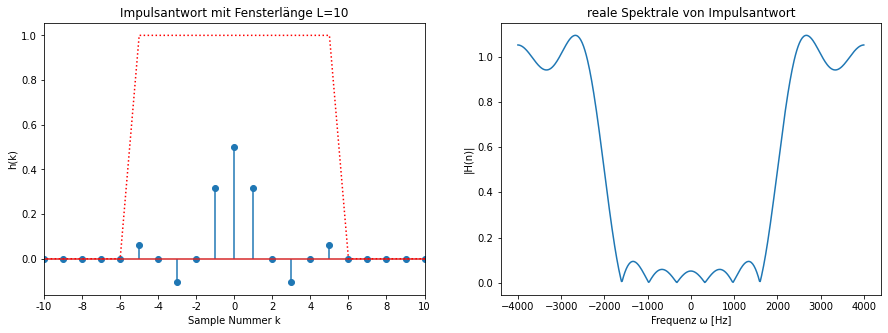

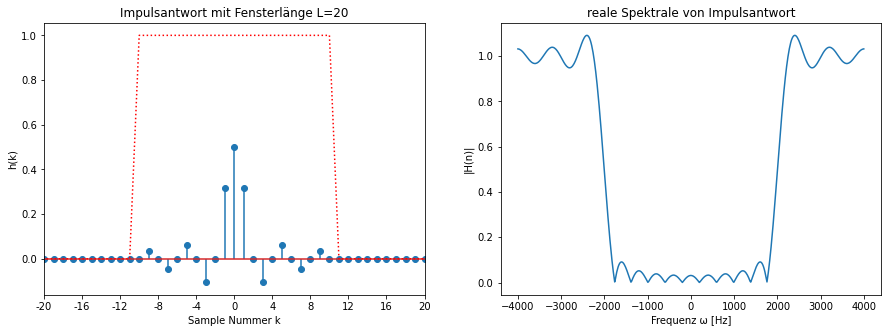

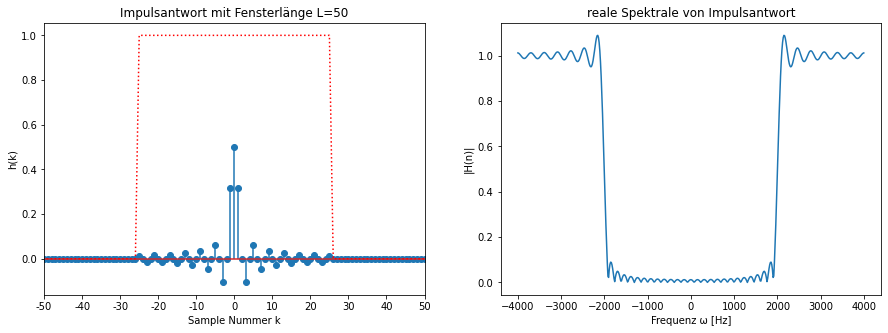

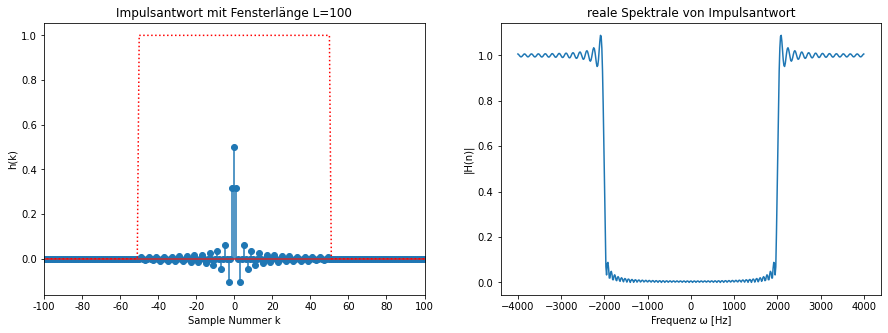

In [211]:
# Lösung
# Fensterung der berechneten Impulsantwort h(k) mit verschiedene Längen L

for L in (10, 20, 50, 100):
    
    # Erzeugung des Fensters:
    window = signal.get_window('boxcar', L+1)
    N = 512 # Länge der FFT
    # Erzeugung einer Maske, mit der nur der Bereich [-L/2, L/2] des Signals ungleich Null ist:
    mask = np.zeros(N) 
    mask[(N-L)//2:(N+L)//2+1] = window      
    h_ist = h * mask
    
    # Frequenzgang bereichnen mit der FFT:
    H_ist = np.abs(fft.fft(h_ist))
    
    # Graphische Darstellung
    plt.subplot(121)
    plt.title('Impulsantwort mit Fensterlänge L=%d' %L)
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('h(k)') 
    plt.xlim(N//2-L, N//2+L)
    plt.xticks(np.arange(N//2-L, N//2+L+1, L//5), range(-L, L+1, L//5))
    plt.stem(np.real(h_ist), use_line_collection=True)
    plt.plot(mask, ls=':', c='r')
    
    plt.subplot(122)
    plt.title('reale Spektrale von Impulsantwort')
    plt.xlabel('Frequenz ω [Hz]') 
    plt.ylabel('|H(n)|') 
    plt.plot(W_rad*fs_Hz/(2*np.pi), H_ist)
    
    plt.gcf().set_size_inches(15, 5)
    plt.show()

Zum Schluss sollen unterschiedliche Fenstertypen auf den Impulsantwort $h$ angewendet und die Veränderung auf den Frequenzgang gegenübergestellt werden.

In [ ]:
# mit verschiedenen Fenstern
L = 50  # Hälfte der Fensterlänge um h(0) herum
N = 512 # Länge der FFT
for windowType in ('boxcar', 'triangle', 'blackman', 'hanning'):
    mask = np.zeros(N)
    mask[(N-L)//2:(N+L)//2+1] = signal.get_window(windowType, L+1)  
    
    # Fensterung von Impulsantwort h:
    h_ist = [..]  # ToDo: Anwenden der Fensters "mask" auf Impulsantwort "h"
    
    # Frequenzgang berechnen mit der FFT:
    H_ist = [..]  # ToDo: führen Sie eine fft über die gefensterte Impulsantwort h_ist durch.
    
    # Plot
    plt.subplot(121)
    plt.title('Impulsantwort durch %s-Fenster' %wd) 
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(150, 350)
    plt.stem(np.real(h_ist), use_line_collection=True)
    plt.plot(mask, ls='--', c='r')
    
    plt.subplot(122)
    plt.title('reale Spektrale von Impulsantwort')
    plt.xlabel('Frequenz ω [rad/s]') 
    plt.ylabel('|H(n)|') 
    plt.plot(W_rad*fs_Hz/(2*np.pi), H_ist)
    
    plt.gcf().set_size_inches(15, 5)
    plt.show()

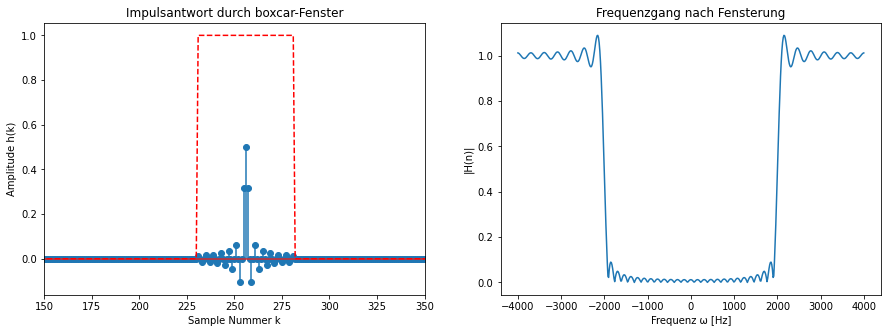

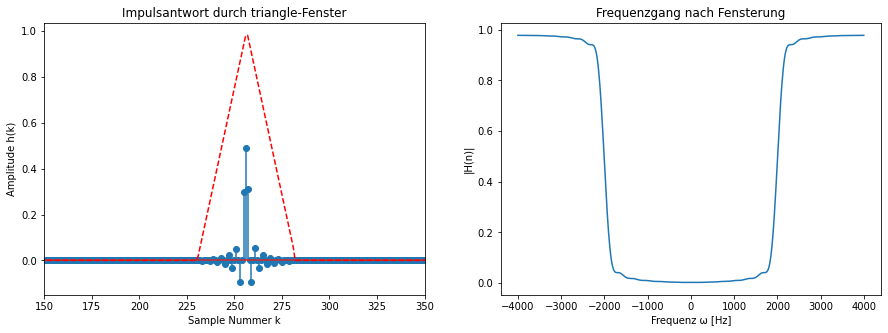

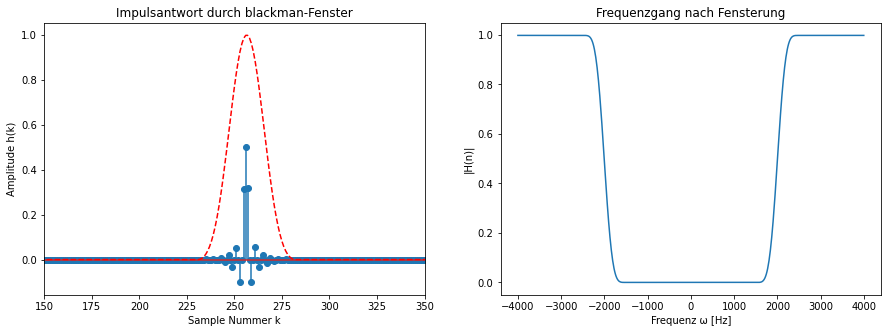

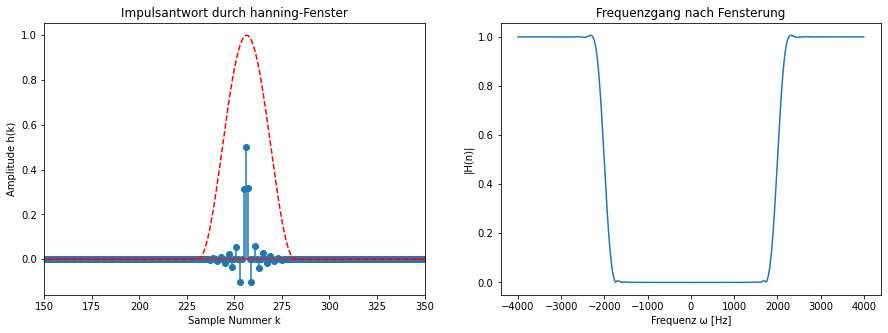

In [213]:
# Lösung
# mit verschiedenen Fenstern
L = 50  # Hälfte der Fensterlänge um h(0) herum
N = 512 # Länge der FFT
for windowType in ('boxcar', 'triangle', 'blackman', 'hanning'):
    mask = np.zeros(N)
    mask[(N-L)//2:(N+L)//2+1] = signal.get_window(windowType, L+1)      
    h_ist = h * mask
    
    # Frequenzgang berechnen mit der FFT:
    H_ist = np.abs(fft.fft(h_ist))
    
    # Plotten:
    plt.subplot(121)
    plt.title('Impulsantwort durch %s-Fenster' %windowType) 
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(150, 350)
    plt.stem(np.real(h_ist), use_line_collection=True)
    plt.plot(mask, ls='--', c='r')
    
    plt.subplot(122)
    plt.title('Frequenzgang nach Fensterung')
    plt.xlabel('Frequenz ω [Hz]') 
    plt.ylabel('|H(n)|') 
    plt.plot(W_rad*fs_Hz/(2*np.pi), H_ist)
    
    plt.gcf().set_size_inches(15, 5)
    plt.show()

----

### References

1. Titelbild von [Lucas Vieira](https://en.wikipedia.org/wiki/Prism#/media/File:Light_dispersion_conceptual_waves.gif)  
2. DSP Guide: [The Scientist and Engineer's Guide to
Digital Signal Processing](http://www.dspguide.com/pdfbook.htm)
3. http://fourier.eng.hmc.edu/e101/lectures/Fourier_Transform_C/node1.html